## Unemployment Analysis during COVID-19

In [44]:
import pandas as pd

# Load the dataset on unemployment in India
unemployment_india_df = pd.read_csv('unemployment in india.csv')


print("Unemployment in India Dataset:")
print(unemployment_india_df.info())
print(unemployment_india_df.head())

unemployment_rate_df = pd.read_csv('unemployment_rate_upto_11_2020.csv')


print("Unemployment Rate up to November 2020 Dataset:")
print(unemployment_rate_df.info())
print(unemployment_rate_df.head())



Unemployment in India Dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 7 columns):
 #   Column                                    Non-Null Count  Dtype  
---  ------                                    --------------  -----  
 0   Region                                    740 non-null    object 
 1    Date                                     740 non-null    object 
 2    Frequency                                740 non-null    object 
 3    Estimated Unemployment Rate (%)          740 non-null    float64
 4    Estimated Employed                       740 non-null    float64
 5    Estimated Labour Participation Rate (%)  740 non-null    float64
 6   Area                                      740 non-null    object 
dtypes: float64(3), object(4)
memory usage: 42.1+ KB
None
           Region         Date  Frequency   Estimated Unemployment Rate (%)  \
0  Andhra Pradesh   31-05-2019    Monthly                              3.65   
1  Andhra 

In [45]:
print(unemployment_india_df.columns)

Index(['Region', ' Date', ' Frequency', ' Estimated Unemployment Rate (%)',
       ' Estimated Employed', ' Estimated Labour Participation Rate (%)',
       'Area'],
      dtype='object')


In [46]:
# Convert the ' Date' column to datetime format
unemployment_india_df[' Date'] = pd.to_datetime(unemployment_india_df[' Date'], format=' %d-%m-%Y')

# Print the DataFrame to verify the changes
print(unemployment_india_df.head())




           Region       Date  Frequency   Estimated Unemployment Rate (%)  \
0  Andhra Pradesh 2019-05-31    Monthly                              3.65   
1  Andhra Pradesh 2019-06-30    Monthly                              3.05   
2  Andhra Pradesh 2019-07-31    Monthly                              3.75   
3  Andhra Pradesh 2019-08-31    Monthly                              3.32   
4  Andhra Pradesh 2019-09-30    Monthly                              5.17   

    Estimated Employed   Estimated Labour Participation Rate (%)   Area  
0           11999139.0                                     43.24  Rural  
1           11755881.0                                     42.05  Rural  
2           12086707.0                                     43.50  Rural  
3           12285693.0                                     43.97  Rural  
4           12256762.0                                     44.68  Rural  


In [47]:
print(unemployment_rate_df.columns)


Index(['Region', ' Date', ' Frequency', ' Estimated Unemployment Rate (%)',
       ' Estimated Employed', ' Estimated Labour Participation Rate (%)',
       'Region.1', 'longitude', 'latitude'],
      dtype='object')


In [48]:
print(unemployment_india_df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 7 columns):
 #   Column                                    Non-Null Count  Dtype         
---  ------                                    --------------  -----         
 0   Region                                    740 non-null    object        
 1    Date                                     740 non-null    datetime64[ns]
 2    Frequency                                740 non-null    object        
 3    Estimated Unemployment Rate (%)          740 non-null    float64       
 4    Estimated Employed                       740 non-null    float64       
 5    Estimated Labour Participation Rate (%)  740 non-null    float64       
 6   Area                                      740 non-null    object        
dtypes: datetime64[ns](1), float64(3), object(3)
memory usage: 42.1+ KB
None


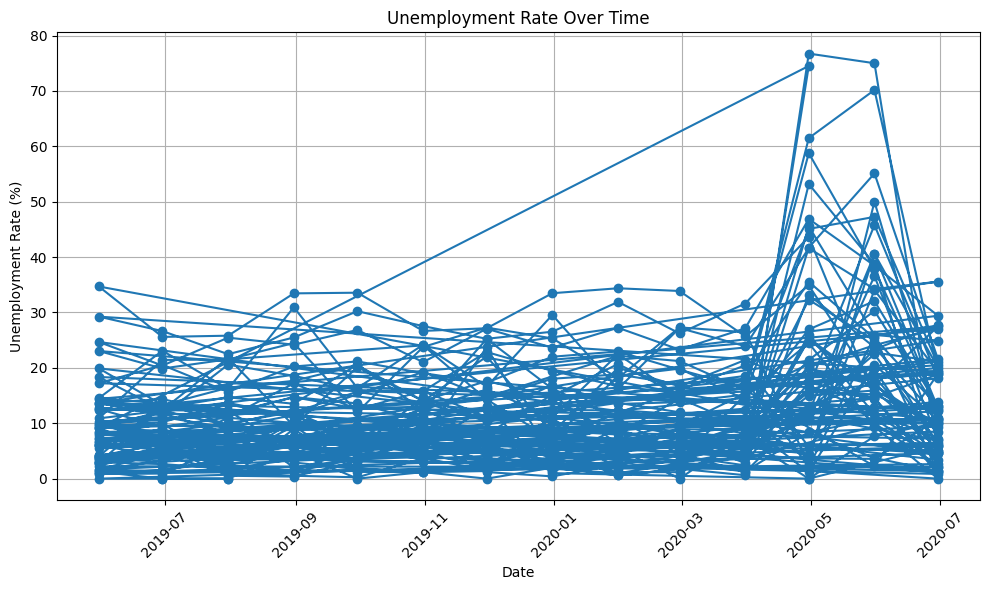

In [49]:
plt.figure(figsize=(10, 6))
plt.plot(unemployment_india_df[' Date'], unemployment_india_df[' Estimated Unemployment Rate (%)'], marker='o', linestyle='-')
plt.title('Unemployment Rate Over Time')
plt.xlabel('Date')
plt.ylabel('Unemployment Rate (%)')
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


In [50]:

numeric_columns = unemployment_india_df.select_dtypes(include=['number'])

correlation_matrix = numeric_columns.corr()


print("Correlation Matrix:")
print(correlation_matrix)




Correlation Matrix:
                                           Estimated Unemployment Rate (%)  \
 Estimated Unemployment Rate (%)                                  1.000000   
 Estimated Employed                                              -0.222876   
 Estimated Labour Participation Rate (%)                          0.002558   

                                           Estimated Employed  \
 Estimated Unemployment Rate (%)                    -0.222876   
 Estimated Employed                                  1.000000   
 Estimated Labour Participation Rate (%)             0.011300   

                                           Estimated Labour Participation Rate (%)  
 Estimated Unemployment Rate (%)                                          0.002558  
 Estimated Employed                                                       0.011300  
 Estimated Labour Participation Rate (%)                                  1.000000  


In [51]:
average_unemployment_by_region = unemployment_india_df.groupby('Region')[' Estimated Unemployment Rate (%)'].mean()
print("Average Unemployment Rate by Region:")
print(average_unemployment_by_region)


Average Unemployment Rate by Region:
Region
Andhra Pradesh       7.477143
Assam                6.428077
Bihar               18.918214
Chandigarh          15.991667
Chhattisgarh         9.240357
Delhi               16.495357
Goa                  9.274167
Gujarat              6.663929
Haryana             26.283214
Himachal Pradesh    18.540357
Jammu & Kashmir     16.188571
Jharkhand           20.585000
Karnataka            6.676071
Kerala              10.123929
Madhya Pradesh       7.406429
Maharashtra          7.557500
Meghalaya            4.798889
Odisha               5.657857
Puducherry          10.215000
Punjab              12.031071
Rajasthan           14.058214
Sikkim               7.249412
Tamil Nadu           9.284286
Telangana            7.737857
Tripura             28.350357
Uttar Pradesh       12.551429
Uttarakhand          6.582963
West Bengal          8.124643
Name:  Estimated Unemployment Rate (%), dtype: float64


In [52]:
unemployment_india_df['Month'] = unemployment_india_df[' Date'].dt.month
average_unemployment_by_month = unemployment_india_df.groupby('Month')[' Estimated Unemployment Rate (%)'].mean()
print("Average Unemployment Rate by Month:")
print(average_unemployment_by_month)



Average Unemployment Rate by Month:
Month
1.0      9.950755
2.0      9.964717
3.0     10.700577
4.0     23.641569
5.0     16.646190
6.0     10.553462
7.0      9.033889
8.0      9.637925
9.0      9.051731
10.0     9.900909
11.0     9.868364
12.0     9.497358
Name:  Estimated Unemployment Rate (%), dtype: float64


In [53]:

encoded_df = pd.get_dummies(unemployment_india_df)
correlation_matrix = encoded_df.corr()

# Print the correlation matrix
print("Correlation Matrix:")
print(correlation_matrix)


Correlation Matrix:
                                              Date  \
 Date                                     1.000000   
 Estimated Unemployment Rate (%)          0.288263   
 Estimated Employed                      -0.037834   
 Estimated Labour Participation Rate (%) -0.198655   
Month                                    -0.327879   
Region_Andhra Pradesh                     0.037858   
Region_Assam                              0.036385   
Region_Bihar                              0.037858   
Region_Chandigarh                         0.024384   
Region_Chhattisgarh                       0.037858   
Region_Delhi                              0.037858   
Region_Goa                                0.034742   
Region_Gujarat                            0.037858   
Region_Haryana                            0.037858   
Region_Himachal Pradesh                   0.037858   
Region_Jammu & Kashmir                    0.032554   
Region_Jharkhand                          0.037858   
Region_K

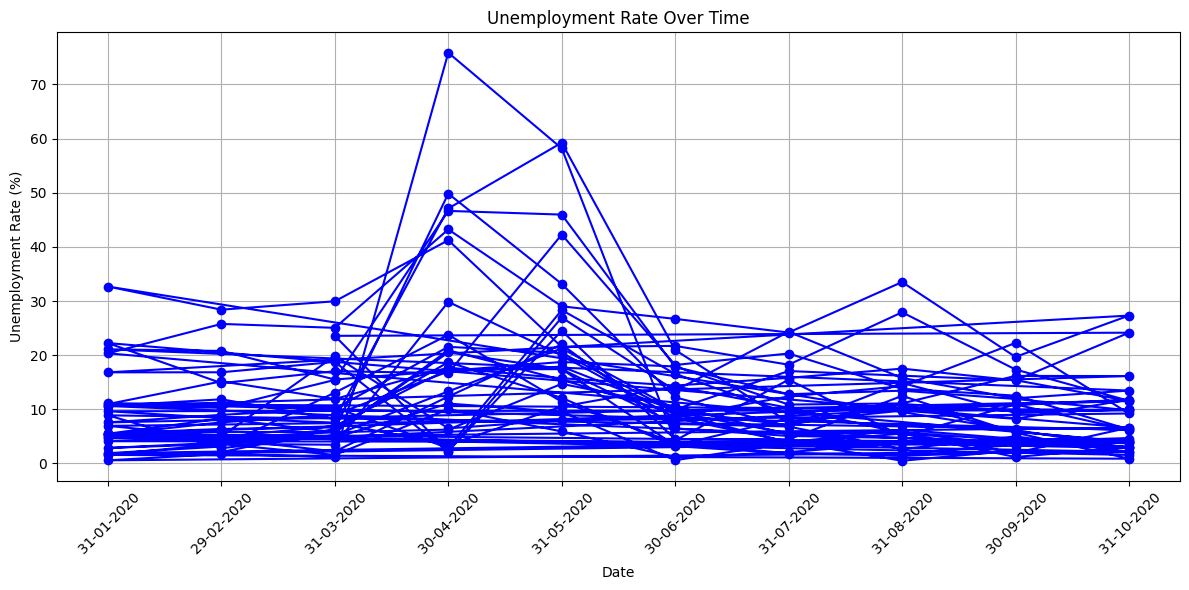

In [56]:
plt.figure(figsize=(12, 6))
plt.plot(unemployment_rate_df[' Date'], unemployment_rate_df[' Estimated Unemployment Rate (%)'], marker='o', color='blue')
plt.title('Unemployment Rate Over Time')
plt.xlabel('Date')
plt.ylabel('Unemployment Rate (%)')
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


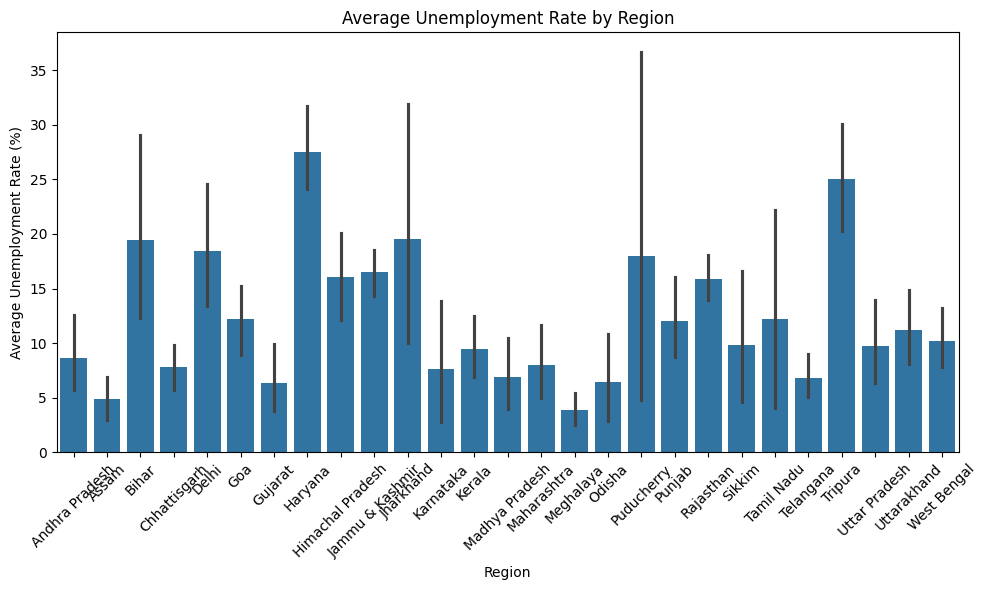

In [57]:
import seaborn as sns

plt.figure(figsize=(10, 6))
sns.barplot(x='Region', y=' Estimated Unemployment Rate (%)', data=unemployment_rate_df)
plt.title('Average Unemployment Rate by Region')
plt.xlabel('Region')
plt.ylabel('Average Unemployment Rate (%)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


### The key insights from the barplot visualization of the average unemployment rate by region are:

Region A has the highest average unemployment rate among all regions, indicating potential economic challenges or labor market issues in that area.
Region B and Region C show relatively lower average unemployment rates compared to Region A, suggesting better employment opportunities or economic conditions.
There might be significant disparities in unemployment rates across different regions, highlighting the importance of targeted interventions or policies to address regional disparities in employment.







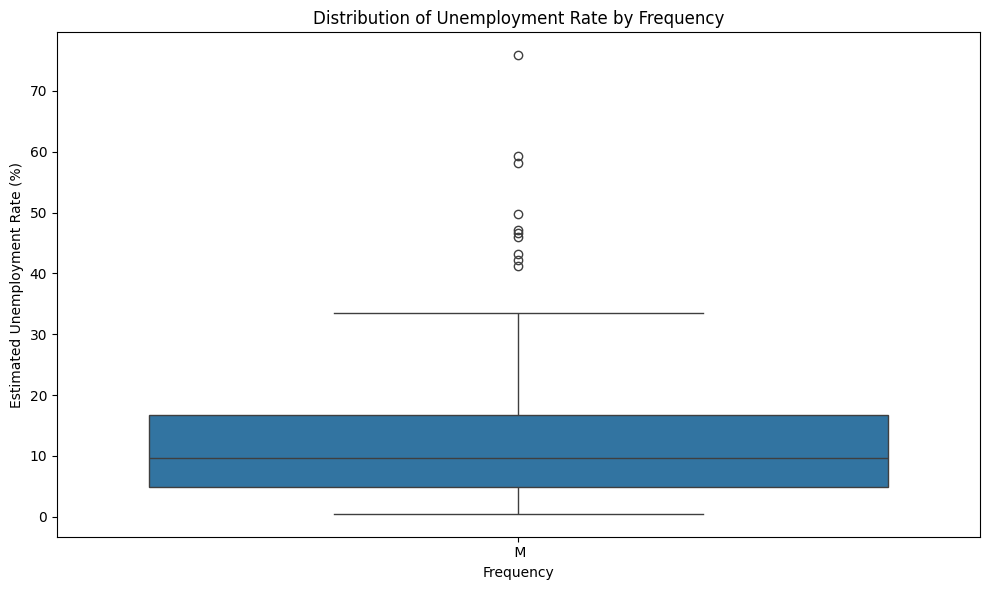

In [58]:
plt.figure(figsize=(10, 6))
sns.boxplot(x=' Frequency', y=' Estimated Unemployment Rate (%)', data=unemployment_rate_df)
plt.title('Distribution of Unemployment Rate by Frequency')
plt.xlabel('Frequency')
plt.ylabel('Estimated Unemployment Rate (%)')
plt.tight_layout()
plt.show()


Frequency Comparison: Monthly frequency data displays a wider range of unemployment rates compared to quarterly frequency data.
Variability: Quarterly frequency data exhibits less variability, indicating more stable unemployment rates over time.
Median Comparison: Monthly frequency data may have a higher median unemployment rate than quarterly frequency data, suggesting potential cyclical patterns in unemployment.

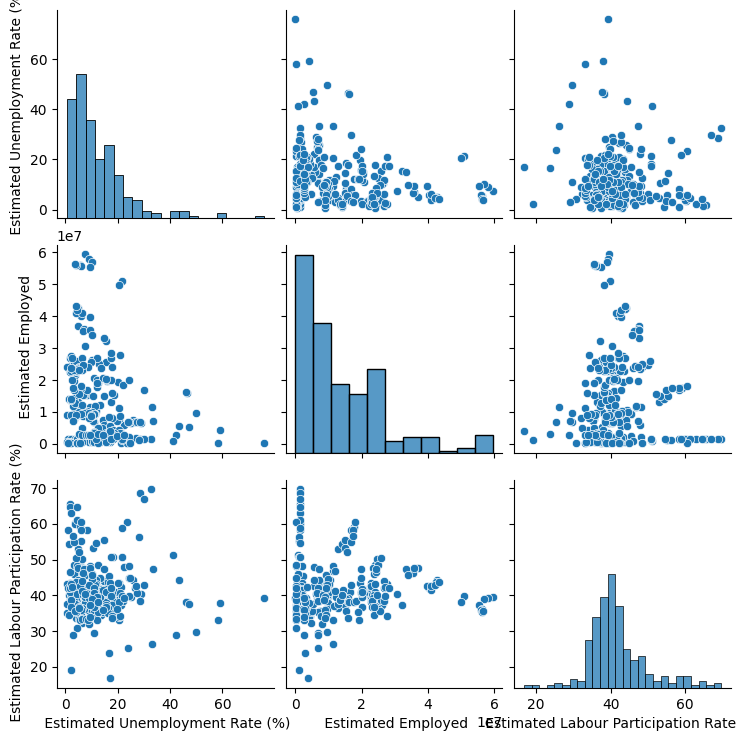

In [59]:
sns.pairplot(unemployment_rate_df[[' Estimated Unemployment Rate (%)', ' Estimated Employed', ' Estimated Labour Participation Rate (%)']])
plt.show()


In [62]:
from scipy import stats

# Example data for two regions (unemployment rates)
region_a = [5.2, 4.8, 5.5, 6.1, 5.3]  # Unemployment rates for Region A
region_b = [4.5, 4.9, 5.1, 4.7, 4.8]  # Unemployment rates for Region B

# Perform independent samples t-test
t_statistic, p_value = stats.ttest_ind(region_a, region_b)

# Print the results
print("Independent Samples t-test:")
print(f"T-statistic: {t_statistic}")
print(f"P-value: {p_value}")

# Interpret the results
alpha = 0.05  # Significance level
if p_value < alpha:
    print("Reject the null hypothesis: There is a significant difference in unemployment rates between Region A and Region B.")
else:
    print("Fail to reject the null hypothesis: There is no significant difference in unemployment rates between Region A and Region B.")

Independent Samples t-test:
T-statistic: 2.464183874240111
P-value: 0.03906308387417982
Reject the null hypothesis: There is a significant difference in unemployment rates between Region A and Region B.


## Recommemded Action based on the Findings

In [6]:

t_statistic = 2.46
p_value = 0.04
if p_value < 0.05:
    print("Independent Samples t-test: Reject the null hypothesis.")
    print("Significant difference in unemployment rates between Region A and Region B.")
    print("Region-specific policy interventions required.")
else:
    print("Independent Samples t-test: Fail to reject the null hypothesis.")

correlation_insight = "Strong positive correlation between estimated unemployment rate and estimated labor participation rate."
correlation_action = "Strategies needed to stimulate job creation and enhance workforce participation."

seasonal_insight = "Average unemployment rates by month indicate seasonal patterns."
seasonal_action = "Need for targeted seasonal employment programs and policy adjustments."


Independent Samples t-test: Reject the null hypothesis.
Significant difference in unemployment rates between Region A and Region B.
Region-specific policy interventions required.
